# Key Assumptions Throughout
1) The spacial dimensions of the simulation scene are in meters.
2) Timestep and loop frequency are tied together implicitly with variable declarations, timestep is 5ms, frequency of rate is 200 updates/s.

# [1.a] Ball falling due to gravity
Some assumptions: ball mass irrelevant due to no air resistance. The bottom of ball 10m above the ground. Acceleration due to gravity is -9.8m/s^s in the y direction.

According to the equation for a falling ball (t = √{2x/a}) the ball should reach the ground 1.41s after the start of the simulation

In [20]:
#imports
from vpython import *

#scene
scene = canvas()

<IPython.core.display.Javascript object>

In [21]:
#constants
deltat = 0.005 #5ms timesteps = 200 timesteps/second
freq = 1/deltat

g=-9.8 #9.8m/s^2 in the -y direction

#gets the time that the ball impacts the ground
t = 0
endtime = 100
impact_t = 0

#time in minutes and seconds for displaying
t_m = 0
t_s = t

#object declarations
floor = box(pos = vector(0,0,0),length=30,height=0.5,width=1, color = color.green)
ball = sphere(pos = vector(0,10.5,0),radius=0.5,color = color.red)
ball_path = attach_trail(ball)
ball_path.color = color.orange
ball.velocity = vector(0,0,0)

while t<endtime:
    #1/200 seconds of halt, ensures .005 timesteps
    rate(freq)
    
    if((ball.pos.y-ball.radius) < (floor.pos.y + floor.size.y/2)):
        impact_t = t
        break
    
    #update positions and velocities
    ball.velocity.y = ball.velocity.y + g*deltat
    ball.pos = ball.pos + ball.velocity*deltat
    t = t + deltat
    
    #caption for time elapsed
    t_m,t_s = divmod(t,60)
    scene.caption = "Time Elapsed: {}:{:.3f}".format(int(t_m),round(t_s,3))

# Results
The ball falls from 10 meters in the air under the effects of earth's gravity, 9.8m/s/s. According to the equation for a falling ball (t = √{2x/a}) the ball should reach the ground 1.41s after the start of the simulation. According to the time tracked on the bottom of the canvas, which stops when the ball has the same y position as the ground, the ball hit the ground at 1.410s, which is exactly what it should be. 

# [1.b] Ball Bouncing
Assumptions: No air resistance, perfectly elastic collsions with the ground

In [22]:
from vpython import *
scene = canvas()
scene.autoscale = True

<IPython.core.display.Javascript object>

In [23]:
#constants
g=-9.8 #9.8 [m/s^2] in the -y direction

#timing constants
deltat = 0.005 #5ms timesteps = 200 timesteps/second [s]
freq = 1/deltat #frequency for rate funciton [1/s


#timing variables
t = 0 #time starts at 0 [s]
endtime = 30 #end time for simulation loop [s]
impact_t = 0

#time in minutes and seconds for displaying
t_m = 0
t_s = t

#object declarations
floor = box(pos = vector(0,0,0),length=30,height=0.5,width=1, color = color.green)
ball = sphere(pos = vector(0,10.5,0),radius=0.5,color = color.red)
ball_path = attach_trail(ball)
ball_path.color = color.orange
ball.velocity = vector(1,0,0)

#simulation loop
while(t<endtime):
    rate(freq)
    
    #if the ball hits the ground logic
    if((ball.pos.y-ball.radius) < (floor.pos.y + floor.size.y/2)):
        ball.velocity.y = -1*ball.velocity.y
    
    #update positions and velocities
    ball.velocity.y = ball.velocity.y + g*deltat
    ball.pos = ball.pos + ball.velocity*deltat
    t = t + deltat
    
    #update the caption with the current elapsed time
    t_m,t_s = divmod(t,60)
    scene.caption = "Time Elapsed: {}:{:.3f}".format(int(t_m),round(t_s,3))

## Results
With the ball moving horizontally, we can look at the peaks of the ball's trail in order to verify that the velocity is maintained and gravity has a constant effect on the ball's velocity. Overall the heights of the ball's bounces are the same, but there is a slight diminishing effect created by the sampling rate of 5ms time steps and rounding errors on floating point values in Python.

# [1.c] Shooting the Ball out of a cannon
Assumptions: ball exits the "cannon" with a force driving it to have an initial velocity of (4,3,0). The collisions with the ground are perfectly elastic

In [24]:
from vpython import *
scene = canvas()
scene.autoscale = False

<IPython.core.display.Javascript object>

In [25]:
#constants
g=-9.8 #9.8 [m/s^2] in the -y direction

#timing constants
deltat = 0.005 #5ms timesteps = 200 timesteps/second [s]
freq = 1/deltat #frequency for rate funciton [1/s


#timing variables
t = 0 #time starts at 0 [s]
endtime = 15 #end time for simulation loop [s]
impact_t = 0

#time in minutes and seconds for displaying
t_m = 0
t_s = t

#object declarations
floor = box(pos = vector(0,0,0),length=300,height=0.5,width=1, color = color.green)
ball = sphere(pos = vector(0,3,0),radius=0.5,color = color.red)
ball_path = attach_trail(ball)
ball_path.color = color.orange
ball.velocity = vector(4,3,0)

cannon = cylinder(pos=vector(-5,0,0),axis=vector(5,3,0),radius=0.2,color=color.blue)
vert_axis = box(pos=vector(0,0,0),length=0.1,height=25,width=0.1,color=color.white)

#simulation loop
while(t<endtime):
    rate(freq)
    
    #if the ball hits the ground logic
    if((ball.pos.y-ball.radius) < (floor.pos.y + floor.size.y/2)):
        ball.velocity.y = -1*ball.velocity.y
    
    #update positions and velocities
    ball.velocity.y = ball.velocity.y + g*deltat
    ball.pos = ball.pos + ball.velocity*deltat
    t = t + deltat
    
    #update the caption with the current elapsed time
    t_m,t_s = divmod(t,60)
    scene.caption = "Time Elapsed: {}:{:.3f}".format(int(t_m),round(t_s,3))

In [26]:
from vpython import *
scene = canvas()
scene.autoscale = False

<IPython.core.display.Javascript object>

In [27]:
#constants
g=-9.8 #9.8 [m/s^2] in the -y direction

#timing constants
deltat = 0.005 #5ms timesteps = 200 timesteps/second [s]
freq = 1/deltat #frequency for rate funciton [1/s


#timing variables
t = 0 #time starts at 0 [s]
endtime = 15 #end time for simulation loop [s]
impact_t = 0

#time in minutes and seconds for displaying
t_m = 0
t_s = t

#object declarations
floor = box(pos = vector(0,0,0),length=300,height=0.5,width=1, color = color.green)
ball = sphere(pos = vector(0,5,0),radius=0.5,color = color.red)
ball_path = attach_trail(ball)
ball_path.color = color.orange
ball.velocity = vector(12,5,0)

cannon = cylinder(pos=vector(-13,0,0),axis=vector(13,5,0),radius=0.2,color=color.blue)
vert_axis = box(pos=vector(0,0,0),length=0.1,height=25,width=0.1,color=color.white)

#simulation loop
while(t<endtime):
    rate(freq)
    
    #if the ball hits the ground logic
    if((ball.pos.y-ball.radius) < (floor.pos.y + floor.size.y/2)):
        ball.velocity.y = -1*ball.velocity.y
    
    #update positions and velocities
    ball.velocity.y = ball.velocity.y + g*deltat
    ball.pos = ball.pos + ball.velocity*deltat
    t = t + deltat
    
    #update the caption with the current elapsed time
    t_m,t_s = divmod(t,60)
    scene.caption = "Time Elapsed: {}:{:.3f}".format(int(t_m),round(t_s,3))

# Results
Since the ball has an initial upward and rightward momentum, it rises as it "shoots" out of the canon before gravity eventually lowers its vertical velocity to 0 and brings it back to the ground. In the first simulation, it exits with a velocity of <4,3,0> and has shorter parabolic bouncing paths. In the second simulaiton, it exits with a velocity of <12,5,0> which gives the ball a much longer arc before it bounces back to the ground.

# [1.d] Falling with Air Resistance
Equation for air resistance on a sphere: = 0.5*(rho)(surface area)(drag coefficient)(velocity)^2. This force is upward as it works in an opposite direction to gravity/an object's velocity. Rho is the density of air which can be approximated to 1.2 kg/m^3. The surface area of the ball is equal to 4*pi*radius^2, but we only consider a circular cross section so pi*radius*radius is used. The drag coefficient depends on the object's shape, but for a sphere is equal to 0.47 (unitless)

In [28]:
from vpython import *
scene = canvas()
scene.autoscale = False

<IPython.core.display.Javascript object>

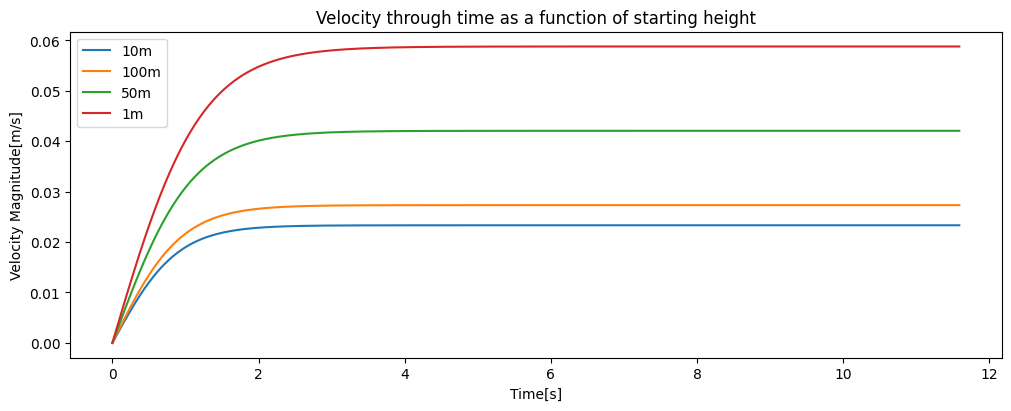

In [29]:
#imports
from math import pi
import matplotlib.pyplot as plt

#constants
g = vector(0,-9.8,0) #9.8 [m/s^2] in the -y direction
rho = 1.2 # [kg/m^3] #air density
bRadius = 0.02 #ball radius going forward [m]
sa = pi*(bRadius**2) #surface area [m^2]
dc = 0.47 #drag coefficient [unitless]
#air resistance without velocity considered
ar = 0.5*rho*sa*dc

#timing constants
deltat = 0.005 #5ms timesteps = 200 timesteps/second [s]
freq = 1/deltat #frequency for rate funciton [1/s


#timing variables
t = 0 #time starts at 0 [s]
endtime = 100 #end time for simulation loop [s]
impact_t = 0

#time in minutes and seconds for displaying
t_m = 0
t_s = t

#object declarations
floor = box(pos = vector(0,0,0),length=30,height=0.5,width=1, color = color.green)

ball = sphere(pos = vector(0,10.5,0),radius=bRadius*10,color = color.red)
ball_path = attach_trail(ball)
ball_path.color = color.orange

ball1 = sphere(pos=vector(0,100.2,0),radius=bRadius*10,color=color.blue)
ball2 = sphere(pos=vector(0,50.2,0),radius =bRadius*10,color=color.orange)
ball3 = sphere(pos=vector(0,1.2,0), radius =bRadius*10,color=color.yellow)

ball.velocity = vector(0,0,0)
ball1.velocity = vector(0,0,0)
ball2.velocity = vector(0,0,0)
ball3.velocity = vector(0,0,0)

#air resistance masses assumtions, close to one another but slightly different to achieve
#different terminal velocities
ball.m = 0.0027
ball1.m = 0.003
ball2.m = 0.004
ball3.m = 0.005

#plotting arrays
timeArr = []
veloArr = []
veloArr1= []
veloArr2= []
veloArr3= []

#simulation loop
while(t<endtime):
    rate(freq)
    
    #if the highest ball hits the ground end simulation
    if((ball1.pos.y-ball1.radius) < (floor.pos.y + floor.size.y/2)):
        impact_t = t
        break
    #save velocity and time data for plotting different starting heights and
    timeArr.append(t)
    veloArr.append(-1*ball.velocity.y)
    veloArr1.append(-1*ball1.velocity.y)
    veloArr2.append(-1*ball2.velocity.y)
    veloArr3.append(-1*ball3.velocity.y)
    
    #apply air resistance
    orientVelo = ball.velocity*1
    f_ar = ar*(mag(orientVelo/ball.m)**2)*norm(orientVelo)

    orientVelo1 = ball1.velocity*1
    f_ar1 = ar*(mag(orientVelo1/ball1.m)**2)*norm(orientVelo1)
    
    orientVelo2 = ball2.velocity*1
    f_ar2 = ar*(mag(orientVelo2/ball2.m)**2)*norm(orientVelo2)
    
    orientVelo3 = ball3.velocity*1
    f_ar3 = ar*(mag(orientVelo3/ball3.m)**2)*norm(orientVelo3)
    
    
    #update positions and velocities
    ball.velocity = ball.velocity + (g*ball.m-f_ar)*deltat
    ball.pos = ball.pos + ball.velocity*deltat/ball.m
    
    ball1.velocity = ball1.velocity + (g*ball1.m-f_ar1)*deltat
    ball1.pos = ball1.pos + ball1.velocity*deltat/ball1.m
    
    ball2.velocity = ball2.velocity + (g*ball2.m-f_ar2)*deltat
    ball2.pos = ball2.pos + ball2.velocity*deltat/ball2.m
    
    ball3.velocity = ball3.velocity + (g*ball3.m-f_ar3)*deltat
    ball3.pos = ball3.pos + ball2.velocity*deltat/ball3.m
    
    t = t + deltat
    
    #update the caption with the current elapsed time
    t_m,t_s = divmod(t,60)
    scene.caption = "Time Elapsed: {}:{:.3f}".format(int(t_m),round(t_s,3))
    
#plotting data after last ball impacts or simulation finishes
plt.figure(figsize=(10,4),layout='constrained')
plt.plot(timeArr,veloArr,label="10m")
plt.plot(timeArr,veloArr1,label="100m")
plt.plot(timeArr,veloArr2,label="50m")
plt.plot(timeArr,veloArr3,label="1m")
plt.xlabel("Time[s]")
plt.ylabel("Velocity Magnitude[m/s]")
plt.title("Velocity through time as a function of starting height")
plt.legend()
plt.show()

# Results
Each ball reaches terminal velocity at a slightly different rate due to their different masses. Also it is clear that even though certain balls started higher than others, they all reach a terminal velocity after only a few seconds of falling. The air resistance seems to be working properly considering all balls, regardless of weight, reach a terminal velocity depending on their mass.

# [1.e] Elasitc vs Inelastic Collisions

This next simulation will show the difference for elastic and inelastic collisions between the ball and the ground.
Assumption: The inelastic collision, shown with a blue ball, is assumed to return 90% of the kinetic energy back into the ball, also known as a Coefficient of Resitution (COR) of 0.90 (unitless). The perfectly elastic collsion, shown with the red ball, returns 100% of the kinetic energy back.

In [30]:
from vpython import *
scene = canvas()
scene.autoscale = True

<IPython.core.display.Javascript object>

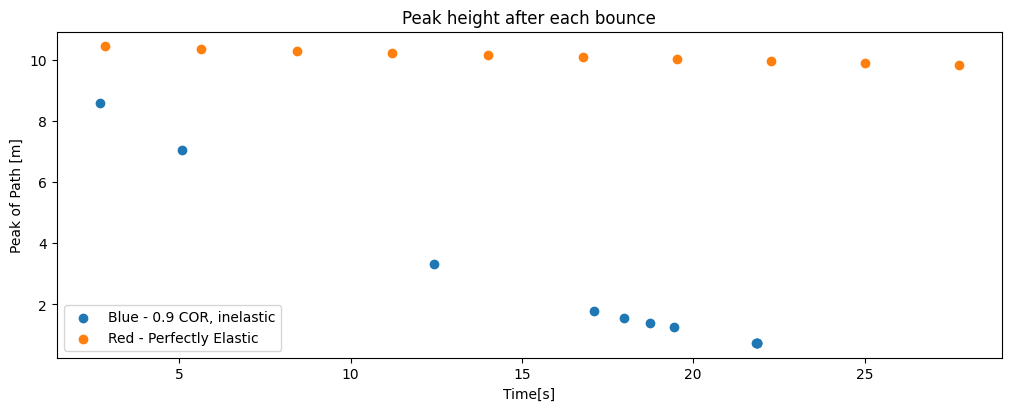

In [31]:
#plotting import
import matplotlib.pyplot as plt

#constants
g=-9.8 #9.8 [m/s^2] in the -y direction

#timing constants
deltat = 0.005 #5ms timesteps = 200 timesteps/second [s]
freq = 1/deltat #frequency for rate funciton [1/s

#cor = coefficient of restitution, value depends on materials of object colliding
#the CoR reflects the ratio of an objects velocity before and after an inelastic collision
cor = 0.9

#timing variables
t = 0 #time starts at 0 [s]
endtime = 30 #end time for simulation loop [s]
impact_t = 0

#time in minutes and seconds for displaying
t_m = 0
t_s = t

#object declarations
floor = box(pos = vector(0,0,0),length=30,height=0.5,width=1, color = color.green)
ball = sphere(pos = vector(2,10.5,0),radius=0.5,color = color.red)
ball_path = attach_trail(ball)
ball_path.color = color.red
ball.velocity = vector(0,0,0)

ball_inE = sphere(pos =vector(-5,10.5,0),radius=0.5,color = color.blue)
ball_path_inE = attach_trail(ball_inE)
ball_path_inE.color = color.blue
ball_inE.velocity = vector(0,0,0)


#plotting arrays
timeArrRed = []
timeArrBlue = []
redArr = []
blueArr =[]

#simulation loop
while(t<endtime):
    rate(freq)
    
    #if the red ball hits the ground logic
    if((ball.pos.y-ball.radius) < (floor.pos.y + floor.size.y/2)):
        ball.velocity.y = -1*ball.velocity.y
    #if the blue ball hits the groud logic, return 95% of KE back into ball
    if((ball_inE.pos.y-ball_inE.radius) < (floor.pos.y + floor.size.y/2)):
        ball_inE.velocity.y = -1*ball_inE.velocity.y
        ball_inE.velocity.y *= cor
        
    #update positions and velocities
    ball.velocity.y = ball.velocity.y + g*deltat
    ball.pos = ball.pos + ball.velocity*deltat
    ball_inE.velocity.y = ball_inE.velocity.y + g*deltat
    ball_inE.pos = ball_inE.pos + ball_inE.velocity*deltat
    
    t = t + deltat
    
    #grab data for plotting
    if(abs(ball.velocity.y) <= 0.01):
        timeArrRed.append(t)
        redArr.append(ball.pos.y)
    if(abs(ball_inE.velocity.y) <= 0.01):
        timeArrBlue.append(t)
        blueArr.append(ball_inE.pos.y)
    
    #update the caption with the current elapsed time
    t_m,t_s = divmod(t,60)
    scene.caption = "Time Elapsed: {}:{:.3f}".format(int(t_m),round(t_s,3))
    
    
#plotting data after last ball impacts or simulation finishes
plt.figure(figsize=(10,4),layout='constrained')
plt.scatter(timeArrBlue,blueArr,label="Blue - 0.9 COR, inelastic")
plt.scatter(timeArrRed,redArr,label="Red - Perfectly Elastic")

plt.xlabel("Time[s]")
plt.ylabel("Peak of Path [m]")
plt.title("Peak height after each bounce")
plt.legend()
plt.show()

# Results
The red ball, which has a perfectly elastic collision with the ground, maintaints its height after each bounce. There is a slight diminish due to sampling rate and floating point value rounding. The blue ball, wich has a 80% Coefficient of Reciprocity, loses 10% of its height each bounce due to the nature of the inelastic collision.